In [1]:
# Import statements
import os
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Max: 2830, Min: -4920


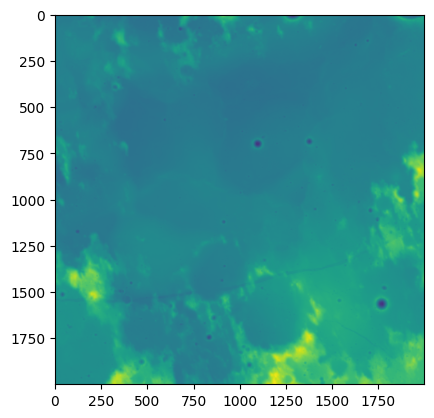

In [4]:
# Load image
base_image = cv.imread("images/interp_test.tif",2)
print("Max: {}, Min: {}".format(np.max(base_image),np.min(base_image)))
plt.imshow(base_image)

In [140]:
def subsample(img,resized):
	rescale = [img.shape[0]//resized[0], img.shape[1]//resized[1]]
	print("Rescale = {}".format(rescale))
	subimage = np.zeros(shape=img.shape).reshape(resized[0]*resized[1],rescale[0],rescale[1])
	print("Subimage Shape: {}".format(subimage.shape))
	for i in range(rescale[1]):
		subimage[i::rescale[1]] = img.reshape(resized[0],-1,resized[1])[:,i::rescale[1]]
		#print(img.reshape(resized[1],-1,rescale[1])[:,i::resized[0]])
	return subimage

In [171]:
# Try subsampling the image via min and max
resized = (10,10)
min_image = np.zeros(shape=resized).reshape(25,2,2)
max_image = np.zeros(shape=resized)

#test = np.arange(100).reshape(5,20)
#print(test)
test = np.arange(16).reshape(4,4)
print(test)

# Get min_image
min_image = np.zeros(shape=(4,2,2))
min_image[::2] = test.reshape(2,4,2)[:,::2]
min_image[1::2] = test.reshape(2,4,2)[:,1::2]
#print(min_image)

# 4x2
min_image2 = np.zeros(shape=(8,1,2)) # 4x2, 4/4, 4/2
min_image2[::2] = test.reshape(4,-1,2)[:,::2] # ::2, (4,-1,2), ::2
min_image2[1::2] = test.reshape(4,-1,2)[:,1::2]
print(min_image2)

# 2x4
min_image3 = np.zeros(shape=(8,2,1))
min_image3[::4] = test.reshape(2,-1,4)[:,::4] 
print(min_image3)

#print(subsample(test,(4,2)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[[ 0.  1.]]

 [[ 2.  3.]]

 [[ 4.  5.]]

 [[ 6.  7.]]

 [[ 8.  9.]]

 [[10. 11.]]

 [[12. 13.]]

 [[14. 15.]]]


ValueError: could not broadcast input array from shape (2,1,4) into shape (2,2,1)